In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("adult.csv", header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#Add relevant headers to the file
headers = ['age', 'Employment_Sector','ID', 'Education_Level','Years_of_Experience','Marital_Status','Job_Title','Relationship',
          'Ethnicity','Sex','Capital_Gain','Capital_Loss','Hours_per_Week','Country','Salary']


In [6]:
df.columns = headers
df.head()

,age,Employment_Sector,ID,Education_Level,Years_of_Experience,Marital_Status,Job_Title,Relationship,Ethnicity,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#How many male and female members are there in this dataset?
df['Sex'].value_counts()


 Male      21790
 Female    10771
Name: Sex, dtype: int64

In [7]:
len(df)

32561

In [8]:
#What are the mean and standard deviation of age for those who earn more
#than 50K per year (salary feature) and those who earn less than 50K per year?
df.dtypes

age                     int64
Employment_Sector      object
ID                      int64
Education_Level        object
Years_of_Experience     int64
Marital_Status         object
Job_Title              object
Relationship           object
Ethnicity              object
Sex                    object
Capital_Gain            int64
Capital_Loss            int64
Hours_per_Week          int64
Country                object
Salary                 object
dtype: object

In [9]:
missing_data = df.isnull()

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

age
False    32561
Name: age, dtype: int64

Employment_Sector
False    32561
Name: Employment_Sector, dtype: int64

ID
False    32561
Name: ID, dtype: int64

Education_Level
False    32561
Name: Education_Level, dtype: int64

Years_of_Experience
False    32561
Name: Years_of_Experience, dtype: int64

Marital_Status
False    32561
Name: Marital_Status, dtype: int64

Job_Title
False    32561
Name: Job_Title, dtype: int64

Relationship
False    32561
Name: Relationship, dtype: int64

Ethnicity
False    32561
Name: Ethnicity, dtype: int64

Sex
False    32561
Name: Sex, dtype: int64

Capital_Gain
False    32561
Name: Capital_Gain, dtype: int64

Capital_Loss
False    32561
Name: Capital_Loss, dtype: int64

Hours_per_Week
False    32561
Name: Hours_per_Week, dtype: int64

Country
False    32561
Name: Country, dtype: int64

Salary
False    32561
Name: Salary, dtype: int64



In [11]:
avg_age=df['age'].astype('int64').mean()
avg_age

38.58164675532078

Text(0.5, 1.0, 'age bins')

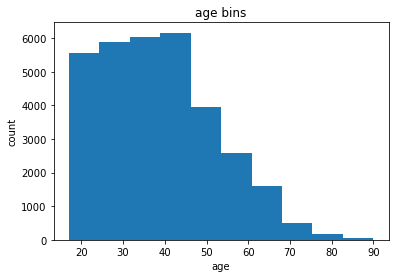

In [12]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["age"])

# set x/y labels and plot title
plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age bins")

Text(0.5, 1.0, 'Salary bins')

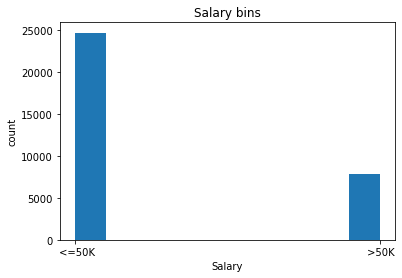

In [13]:
plt.pyplot.hist(df["Salary"])

# set x/y labels and plot title
plt.pyplot.xlabel("Salary")
plt.pyplot.ylabel("count")
plt.pyplot.title("Salary bins")

In [25]:
data1 = df.loc[df['Salary'] == " <=50K", ['age']]
data1.mean()

age    36.783738
dtype: float64

In [27]:
df.loc[df['Salary'] == ' <=50K', 'age'].mean()

36.78373786407767

In [21]:
groupdf = df[['Salary', 'age']]
groupdf.head()

,Salary,age
0,<=50K,39
1,<=50K,50
2,<=50K,38
3,<=50K,53
4,<=50K,28


In [22]:
groupdfavg = groupdf.groupby(['Salary'],as_index=False).mean()
groupdfavg

,Salary,age
0,<=50K,36.783738
1,>50K,44.249841


In [23]:
groupdfstd = groupdf.groupby(['Salary'],as_index=False).std()
groupdfstd

,Salary,age
0,<=50K,14.020088
1,>50K,10.519028


In [31]:
df.groupby("Salary")['Education_Level'].unique()


Salary
 <=50K    [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
 >50K     [ HS-grad,  Masters,  Bachelors,  Some-college...
Name: Education_Level, dtype: object

In [33]:
df.groupby(["Ethnicity","Sex"])["age"].describe()

count       mean        std   min   25%   50%  \
Ethnicity           Sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   max  
Ethnicity           Sex                   
 Amer-Indian-Eskimo  Female  46.00  80.0  
                     Male    45.00  82.0  
 Asian-Pac-Islander  Female  43.75  75.0  
                     Male    46.00  90.0  
 Black               Female  46.00  90.0  
                     Male    46.00  90.0  
 Other               Female  39.00  74.0  
                     Male    42.00  77.0  
 White               Female  46.00  90.0  
                     Male    49.00  90.0

In [43]:
df.loc[(df['Sex'] == ' Male') &
     (df['Marital_Status'].isin([' Never-married', 
                                   ' Separated', 
                                   ' Divorced',
                                   ' Widowed'])), 'Salary'].value_counts()

 <=50K    7552
 >50K      697
Name: Salary, dtype: int64

In [62]:
df.loc[(df['Sex'] == ' Male') &
     (df['Marital_Status'].str.startswith(' Married')), 'Salary'].value_counts()

 <=50K    7576
 >50K     5965
Name: Salary, dtype: int64

In [40]:
df.groupby(["Salary"])["Marital_Status"].describe()


,count,unique,top,freq
Salary,,,,
<=50K,24720,7,Never-married,10192
>50K,7841,7,Married-civ-spouse,6692


In [55]:
df.groupby(["Salary","Marital_Status","Sex"])["Marital_Status"].count()


Salary  Marital_Status          Sex    
 <=50K   Divorced                Female    2493
                                 Male      1487
         Married-AF-spouse       Female       8
                                 Male         5
         Married-civ-spouse      Female     903
                                 Male      7381
         Married-spouse-absent   Female     194
                                 Male       190
         Never-married           Female    4601
                                 Male      5591
         Separated               Female     614
                                 Male       345
         Widowed                 Female     779
                                 Male       129
 >50K    Divorced                Female     179
                                 Male       284
         Married-AF-spouse       Female       6
                                 Male         4
         Married-civ-spouse      Female     754
                                 Male      5938


In [26]:
df_gptest = df[["Salary","Marital_Status","Sex"]]
grouped_test1 = df_gptest.groupby(['Salary','Sex','Marital_Status'])
grouped_test1["Marital_Status"].count()

Salary  Sex      Marital_Status        
 <=50K   Female   Divorced                 2493
                  Married-AF-spouse           8
                  Married-civ-spouse        903
                  Married-spouse-absent     194
                  Never-married            4601
                  Separated                 614
                  Widowed                   779
         Male     Divorced                 1487
                  Married-AF-spouse           5
                  Married-civ-spouse       7381
                  Married-spouse-absent     190
                  Never-married            5591
                  Separated                 345
                  Widowed                   129
 >50K    Female   Divorced                  179
                  Married-AF-spouse           6
                  Married-civ-spouse        754
                  Married-spouse-absent      11
                  Never-married             166
                  Separated                  17
